# Collect The Dataset

## Importing the libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

## Read the dataset

In [ ]:
#reading csv file

df = pd.read_csv('garments_worker_productivity.csv')

In [ ]:
#previewing top rows
df.head(4)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570


In [ ]:
#previewing bottom 4 rows
df.tail(4)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


In [ ]:
# checking the shape of the dataset
df.shape

(1197, 15)

# Data Preparation

## Handling Missing Values

In [ ]:
#Checking datatypes, null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
#renaming ambiguous columns
df = df.rename(columns={'wip': 'work_in_progress', 'smv':'std_minute_value'})

#separating variables for ease of analysis to those that can
#be considered continuous and categorical
cat = ["quarter", "department", "day", "team", "no_of_style_change"]
contin = ["targeted_productivity", "std_minute_value", "work_in_progress", "over_time", "idle_men", "incentive", "idle_time", "no_of_workers", "actual_productivity"]

#checking for missing values
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
std_minute_value           0
work_in_progress         506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
#checking skewness
df.work_in_progress.skew()

9.741786273952965

In [ ]:
#filling in missing values with median as opposed to mean since the data is skewed

df['work_in_progress'].fillna(df['work_in_progress'].median(),inplace=True)

In [ ]:
#checking that there are no longer missing values
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
std_minute_value         0
work_in_progress         0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

In [ ]:
#function to remove _ from titles

def title(x):
  return x.replace('_', ' ')

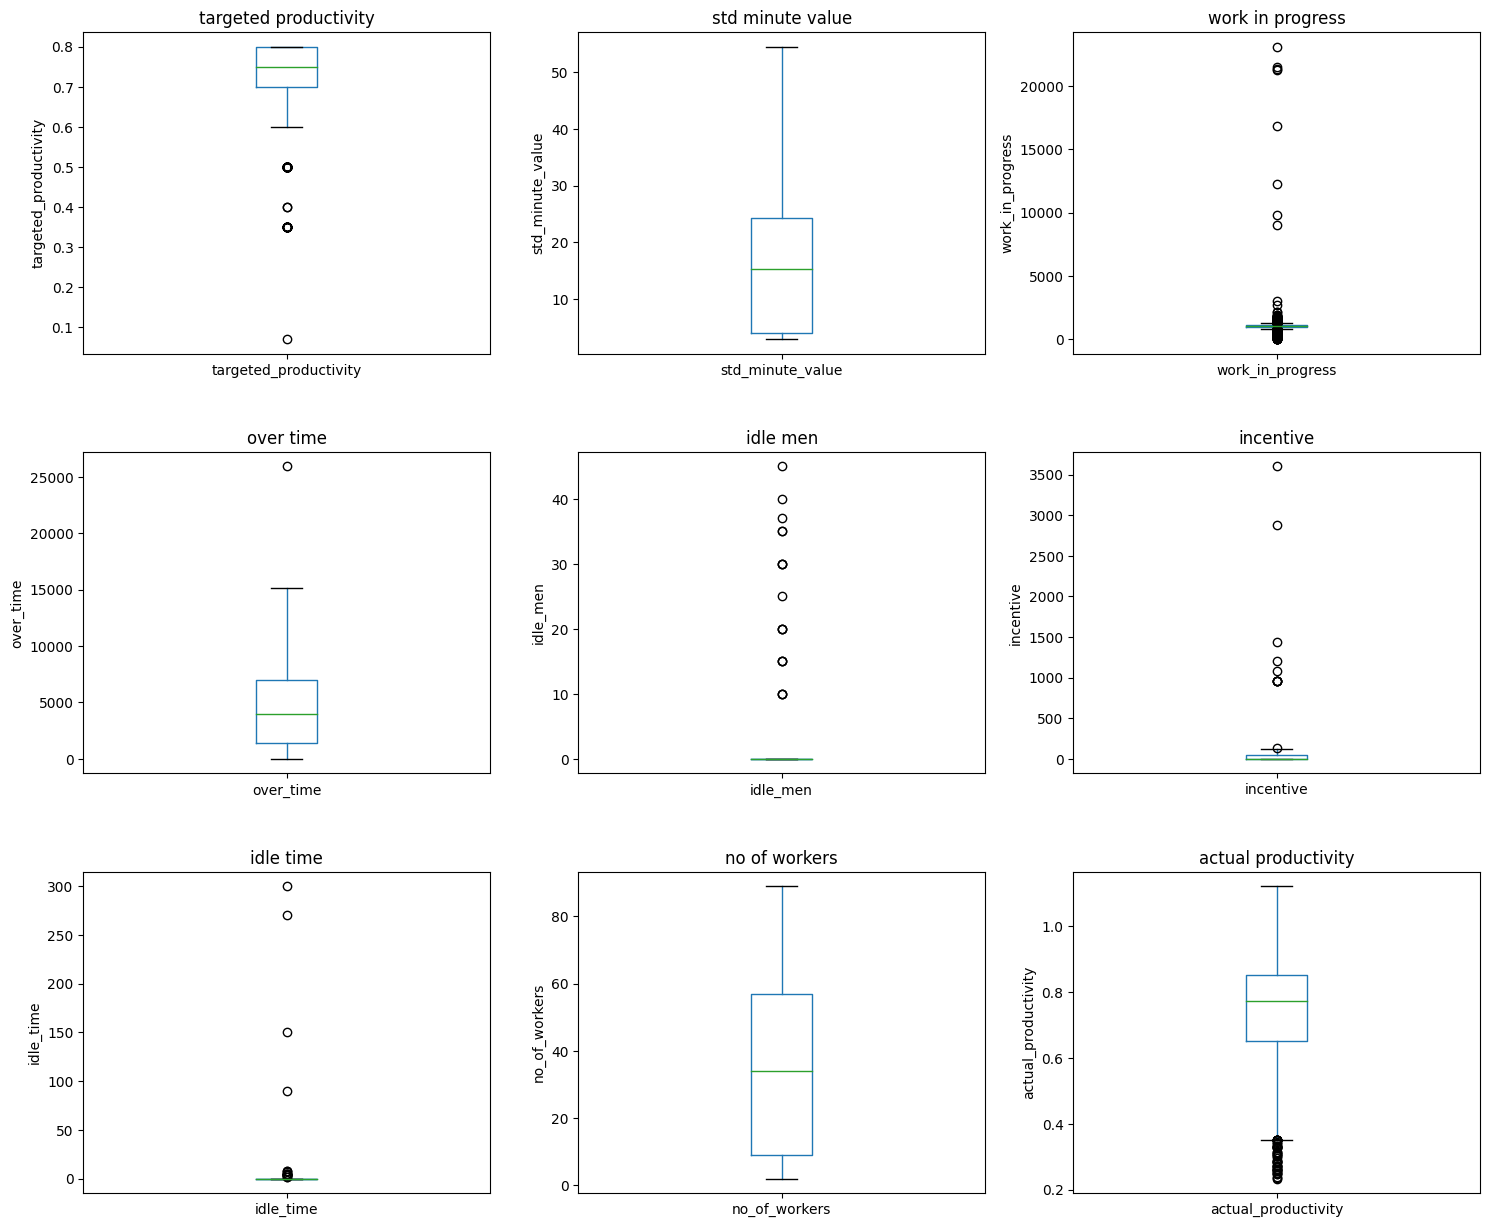

In [ ]:
# Checking for outliers in continuous data

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  df.boxplot(contin[i], grid=False, ax=ax)
  ax.set_title(f"{title(contin[i])}")
  ax.set_ylabel(contin[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

In [ ]:
#checking for anomalies

#None of the values in the continuous columns should be negative
for col in contin:
  print(len(df[df[col] < 0]))
#number of workers in each team should be a whole number
df['no_of_workers'].unique()

0
0
0
0
0
0
0
0
0


array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. , 18. , 60. , 12. , 20. ,
       17. , 56.5, 54.5, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. , 32. ,
       58.5, 15. ,  5. , 57. , 53. , 51.5,  2. ,  9. ,  7. , 19. , 28. ,
       34. , 89. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. , 11. ,
       33.5, 22. , 26. , 27. , 59.5, 50. , 44. , 49. , 47. , 48. , 42. ,
       24. , 45. , 46. , 39. , 38. ,  6. ])

In [ ]:
#to deal with the anomalies above, the figures will be truncated

df['no_of_workers'] = df['no_of_workers'].apply(lambda x: int(x))
#checking that the figures were truncated

df['no_of_workers'].unique()

array([59,  8, 30, 56, 57, 55, 54, 18, 60, 12, 20, 17, 29, 31, 58, 10, 16,
       32, 15,  5, 53, 51,  2,  9,  7, 19, 28, 34, 89, 14, 25, 52,  4, 21,
       35, 33, 11, 22, 26, 27, 50, 44, 49, 47, 48, 42, 24, 45, 46, 39, 38,
        6])

In [ ]:
#checking for anomalies

for col in cat:
  print(col)
  print(df[col].unique())
  print('\n')

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


department
['sweing' 'finishing ' 'finishing']


day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


team
[ 8  1 11 12  6  7  2  3  9 10  5  4]


no_of_style_change
[0 1 2]




In [ ]:
#exploring the anomalous quarter5
df[df['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,1039.0,1200,0,0.0,0,0,10,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,1039.0,1200,0,0.0,0,0,10,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,1039.0,960,0,0.0,0,0,8,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,1039.0,960,0,0.0,0,0,8,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,1039.0,1200,0,0.0,0,0,10,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,1039.0,1200,0,0.0,0,0,10,0.853667


## Handling Independent Columns

In [ ]:
#replacing quarter5 (given to jan days above 28) with quarter1
df['quarter'] = df.quarter.str.replace('Quarter5', 'Quarter1')

#checking that there are now 4 quarters only
df.quarter.unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'], dtype=object)

In [ ]:
# Removing the word Quarter from the quarter column and leave the numbers
df['quarter'] = df['quarter'].str.replace('Quarter','')

# Changing the datatype to numeric
df['quarter'] = df['quarter'].astype(int)

#confirming changes
print(df.quarter.unique())
print(df.quarter.dtype)

#Correcting the spelling of sewing in the department column
df['department'] = df['department'].str.replace('sweing','sewing')

# Removing the spacing from the word finishing in the department column
df['department'] = df['department'].str.replace('finishing ','finishing')

#confirming changes
df['department'].unique()

[1 2 3 4]
int64


array(['sewing', 'finishing'], dtype=object)

In [ ]:
df.drop(['date', 'targeted_productivity'], axis=1, inplace=True)
df.head()

,quarter,department,day,team,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,sewing,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,1,finishing,Thursday,1,3.94,1039.0,960,0,0.0,0,0,8,0.886500
2,1,sewing,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,1,sewing,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,1,sewing,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56,0.800382


In [ ]:
df = df.rename (columns = {
'team' : 'team_number',
'smv': 'std_minute_value',
'wip':
'work_in_progress',
'no_of_style_change' : 'style_change'
})
df

,quarter,department,day,team_number,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
0,1,sewing,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,1,finishing,Thursday,1,3.94,1039.0,960,0,0.0,0,0,8,0.886500
2,1,sewing,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,1,sewing,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,1,sewing,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2,finishing,Wednesday,10,2.90,1039.0,960,0,0.0,0,0,8,0.628333
1193,2,finishing,Wednesday,8,3.90,1039.0,960,0,0.0,0,0,8,0.625625
1194,2,finishing,Wednesday,7,3.90,1039.0,960,0,0.0,0,0,8,0.625625
1195,2,finishing,Wednesday,9,2.90,1039.0,1800,0,0.0,0,0,15,0.505889


In [ ]:
#datatype conversion

df['team_number'] = df['team_number'].astype(int)
df['over_time'] = df['over_time'].astype(int)
df['incentive'] = df['incentive'].astype(int)
df['idle_time'] = df['idle_time'].astype(int)
df['idle_men'] = df['idle_men'].astype(int)
df['std_minute_value'] = df['std_minute_value'].astype(int)
df['style_change'] = df['style_change'].astype(int)
df['work_in_progress'] = df['work_in_progress'].astype(int)
df['idle_time'] = df['idle_time'].astype(int)
df['no_of_workers'] = df['no_of_workers'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   quarter              1197 non-null   int64  
 1   department           1197 non-null   object 
 2   day                  1197 non-null   object 
 3   team_number          1197 non-null   int64  
 4   std_minute_value     1197 non-null   int64  
 5   work_in_progress     1197 non-null   int64  
 6   over_time            1197 non-null   int64  
 7   incentive            1197 non-null   int64  
 8   idle_time            1197 non-null   int64  
 9   idle_men             1197 non-null   int64  
 10  style_change         1197 non-null   int64  
 11  no_of_workers        1197 non-null   int64  
 12  actual_productivity  1197 non-null   float64
dtypes: float64(1), int64(10), object(2)
memory usage: 121.7+ KB


## Handling Categorical Values

In [ ]:
lc = LabelEncoder()

In [ ]:
#encoding the values in a column named "department"
print('Before Encoding', df['department'].unique())
df['department']= lc.fit_transform(df['department'])
print('After Encoding', df['department'].unique())

Before Encoding ['sewing' 'finishing']
After Encoding [1 0]


In [ ]:
#encoding the values in a column named "day"
print('Before Encoding', df['day'].unique())
df['day']= lc.fit_transform(df['day'])
print('After Encoding', df['day'].unique())

Before Encoding ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
After Encoding [3 1 2 0 4 5]


# Descriptive Statistical

In [ ]:
#statistical summaries of various numerical variables
df.describe(include='all')

,quarter,department,day,team_number,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2.252297,0.577277,2.534670,6.426901,14.508772,1126.437761,4567.460317,38.210526,0.727652,0.369256,0.150376,34.551378,0.735091
std,1.130974,0.494199,1.714538,3.463963,11.067638,1397.653191,3348.823563,160.182643,12.709094,3.268987,0.427848,22.152559,0.174488
min,1.000000,0.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,1.000000,0.000000,1.000000,3.000000,3.000000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2.000000,1.000000,3.000000,6.000000,15.000000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,3.000000,1.000000,4.000000,9.000000,24.000000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,4.000000,1.000000,5.000000,12.000000,54.000000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


# Visual Analysis


## Univariate analysis

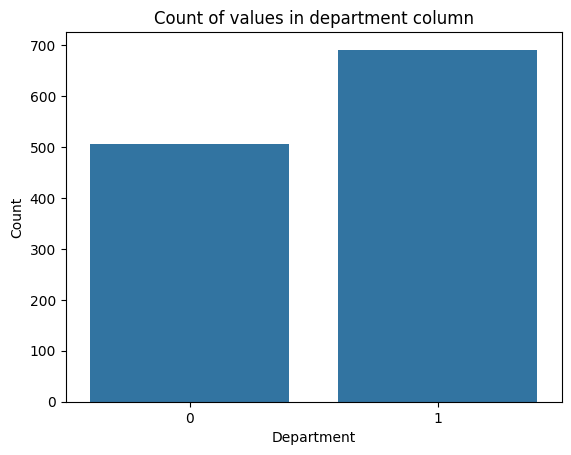

In [ ]:
sns.countplot(data = df,x='department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Count of values in department column')
plt.show()

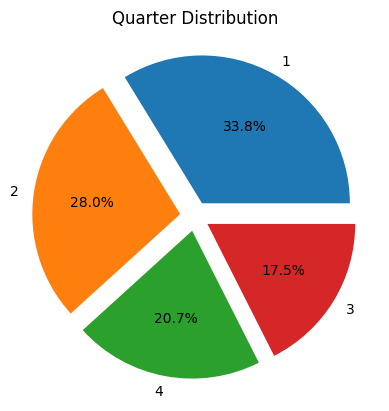

In [ ]:
quarter_count=df['quarter'].value_counts()
plt.figure()
plt.pie(quarter_count,labels=quarter_count.index,autopct='%1.1f%%',explode=[0.1,0.1,0.1,0.1])
plt.title('Quarter Distribution')
plt.show()

## Bivariate Analysis

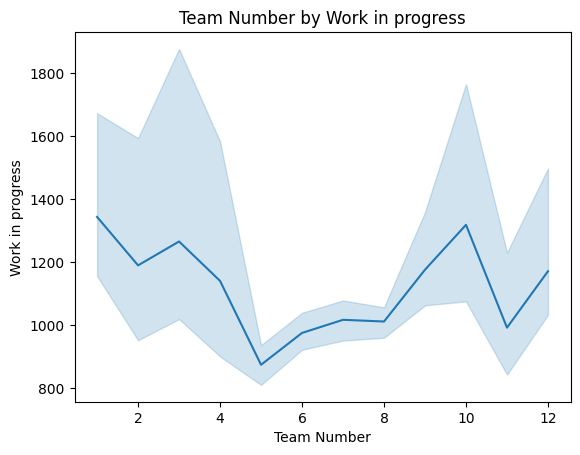

In [ ]:
sns.lineplot(data=df,x='team_number',y='work_in_progress')
plt.xlabel('Team Number')
plt.ylabel('Work in progress')
plt.title('Team Number by Work in progress')
plt.show()

## Multivariate Analysis

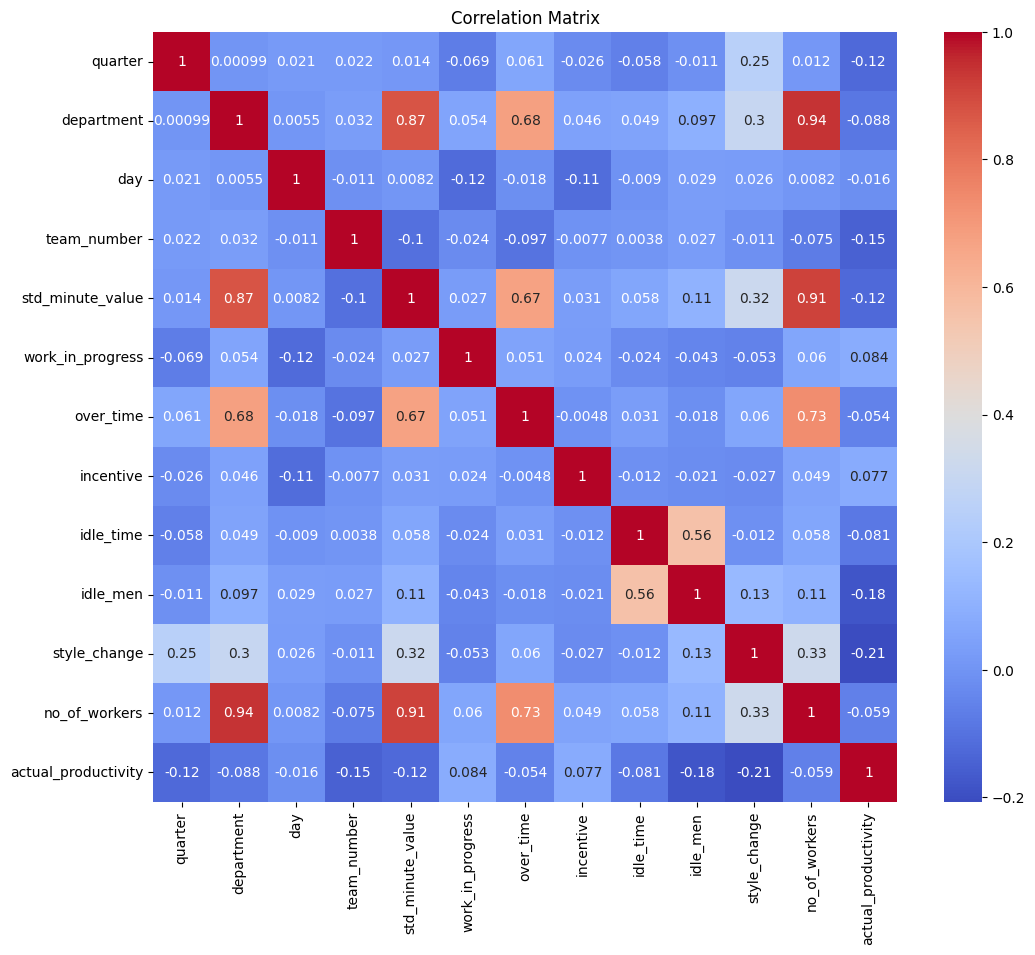

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

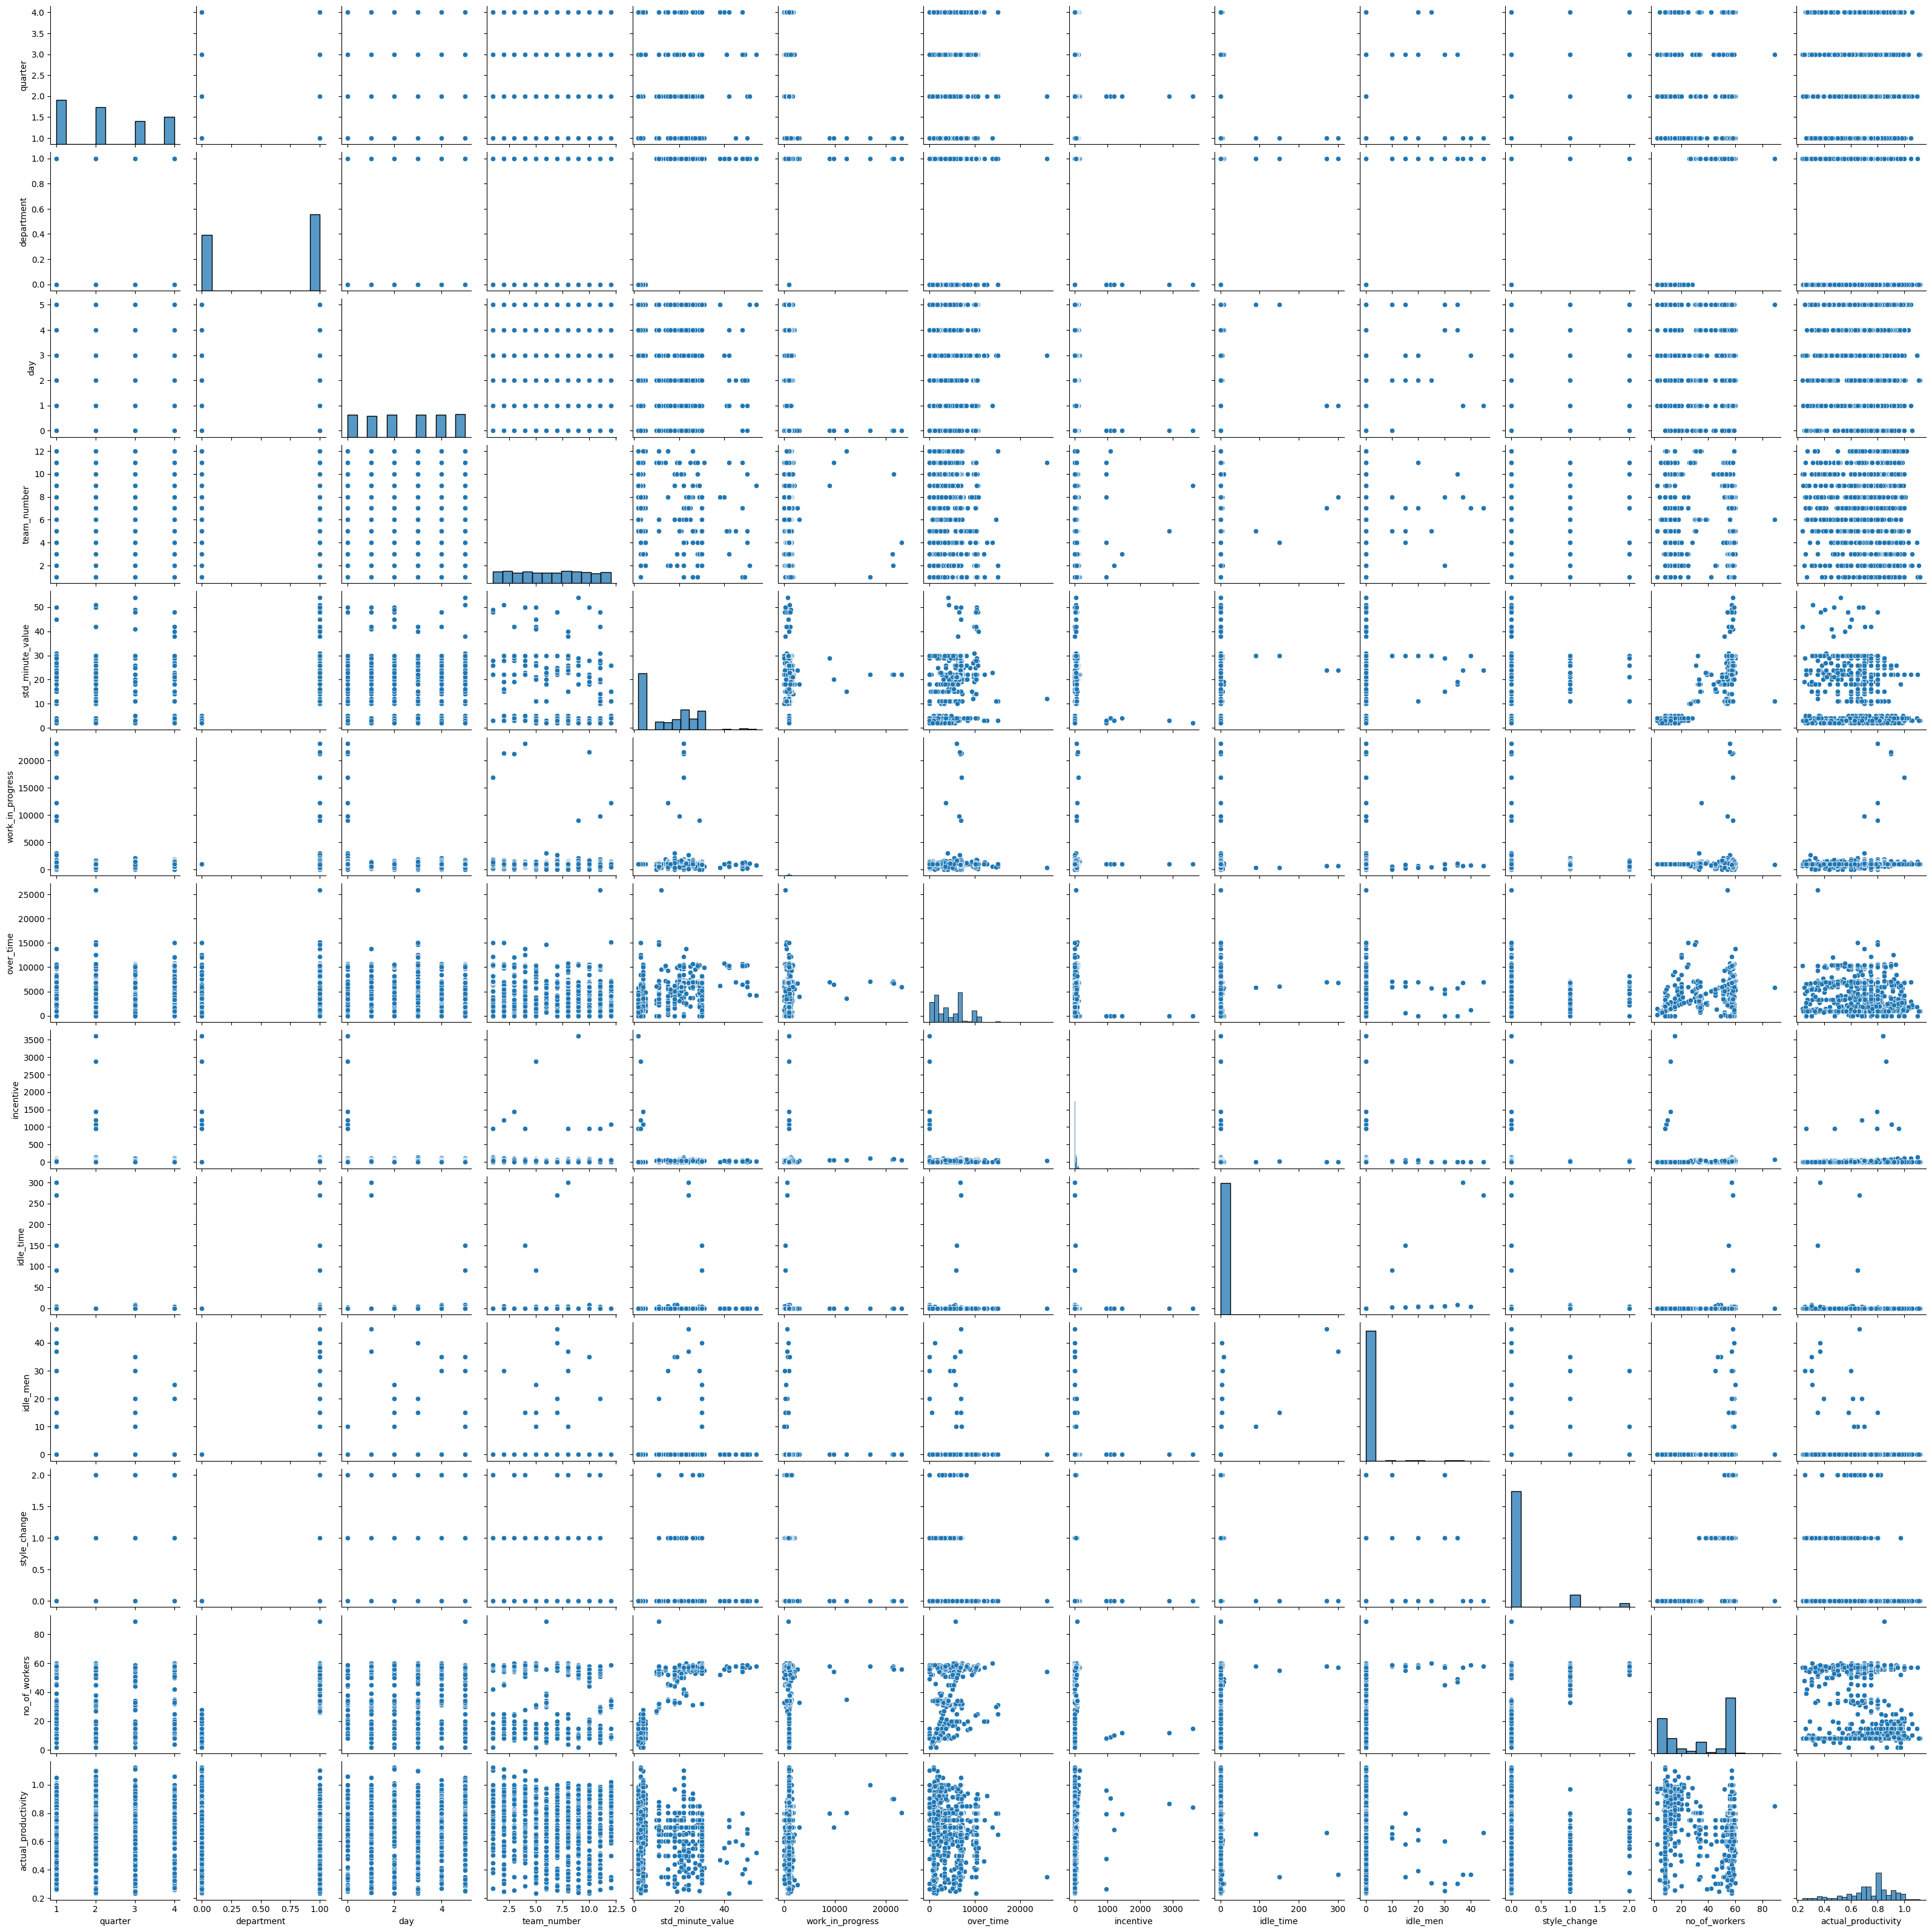

In [ ]:
sns.pairplot(df)

Splitting Data

In [ ]:
x = df.drop(['actual_productivity'], axis = 1)
y = df['actual_productivity']
x, y

(      quarter  department  day  team_number  std_minute_value  \
 0           1           1    3            8                26   
 1           1           0    3            1                 3   
 2           1           1    3           11                11   
 3           1           1    3           12                11   
 4           1           1    3            6                25   
 ...       ...         ...  ...          ...               ...   
 1192        2           0    5           10                 2   
 1193        2           0    5            8                 3   
 1194        2           0    5            7                 3   
 1195        2           0    5            9                 2   
 1196        2           0    5            6                 2   
 
       work_in_progress  over_time  incentive  idle_time  idle_men  \
 0                 1108       7080         98          0         0   
 1                 1039        960          0          0         0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(957, 12)
(240, 12)
(957,)
(240,)


Applying Standard Scaler

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
pickle.dump(sc, open('scaler.pkl', 'wb'))

# Model Building

## Linear Regression Model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_pred_train = lin_reg.predict(x_train)
y_pred_test = lin_reg.predict(x_test)

In [ ]:
# training score
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('Linear Train Root Mean Squared Error:', rmse_train)


Linear Train Root Mean Squared Error: 0.16226529653729893


In [ ]:
# testing score
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print('Linear Test Root mean Squared Error:',rmse_test)

Linear Test Root mean Squared Error: 0.16116562949494234


## Lasso Regression Model

In [ ]:
lasso = Lasso(alpha = 0.001)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [ ]:
y_pred_train = lasso.predict(x_train)
y_pred_test = lasso.predict(x_test)

In [ ]:
# training score
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('Lasso Train Root Mean Squared Error:', rmse_train)

Lasso Train Root Mean Squared Error: 0.16246420183571206


In [ ]:
# testing score
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print('Lasso Test Root Mean Squared Error:', rmse_test)

Lasso Test Root Mean Squared Error: 0.16121034106828316


## Ridge Regression Model

In [ ]:
ridge = Ridge(alpha = 1.9)
ridge.fit(x_train, y_train)

Ridge(alpha=1.9)

In [ ]:
y_pred_train = ridge.predict(x_train)
y_pred_test = ridge.predict(x_test)

In [ ]:
# training score
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('Ridge Train Root Mean Squared Error:', rmse_train)

Ridge Train Root Mean Squared Error: 0.16226837609384914


In [ ]:
# testing score
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print('Ridge Test Root mean Squared Error:', rmse_test)

Ridge Test Root mean Squared Error: 0.16115218890295427


## Decision Tree Regressor Model

In [ ]:
dtr = DecisionTreeRegressor(max_depth= 4,
                            min_samples_split= 3,
                            min_samples_leaf= 2)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=3)

In [ ]:
y_pred_train = dtr.predict(x_train)
y_pred_test = dtr.predict(x_test)

In [ ]:
# training score
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('Decision Tree Train Root Mean Squared Error:', rmse_train)

Decision Tree Train Root Mean Squared Error: 0.13187559206436333


In [ ]:
# testing score
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print('Decision Tree Test Root mean Squared Error:', rmse_test)

Decision Tree Test Root mean Squared Error: 0.12918875831022708


## Random Forest Regressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=6,
                            min_weight_fraction_leaf=0.05,
                            max_features=0.8,
                            random_state=42)
rfr.fit(x_train,y_train)


RandomForestRegressor(max_depth=6, max_features=0.8,
                      min_weight_fraction_leaf=0.05, random_state=42)

In [ ]:
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


In [ ]:
# training score
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('Random Forest Train Root Mean Squared Error:', rmse_train)



Random Forest Train Root Mean Squared Error: 0.13062916799216504


In [ ]:
# testing score
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print('Random Forest Test Root mean Squared Error:', rmse_test)



Random Forest Test Root mean Squared Error: 0.1272406384012021


## Gradient Boosting Regressor

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100,
                                learning_rate=0.1,
                                max_depth=1,
                                random_state=42)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [ ]:
y_pred_train = gbr.predict(x_train)
y_pred_test = gbr.predict(x_test)

In [ ]:
# training score
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('Gradient Boosting Train Root Mean Squared Error:', rmse_train)

Gradient Boosting Train Root Mean Squared Error: 0.1424427737607694


In [ ]:
# testing score
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print('Gradient Boosting Test Root mean Squared Error:', rmse_test)

Gradient Boosting Test Root mean Squared Error: 0.13953081336729123


## Extreme Gradient Boost Regressor

In [ ]:
xgb = XGBRegressor (n_estimators=300,
                    learning_rate=0.05,
                    max_leaves = 3,
                    random_state = 1)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [ ]:
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

In [ ]:
# training score
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('Extreme Gradient Boosting Train Root Mean Squared Error:', rmse_train)

Extreme Gradient Boosting Train Root Mean Squared Error: 0.12323119231675213


In [ ]:
# testing score
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print('Extreme Gradient Boosting Test Root mean Squared Error:', rmse_test)

Extreme Gradient Boosting Test Root mean Squared Error: 0.12085573039635658


## Bagging  Regressor

In [ ]:
# Define base model
base_model = XGBRegressor(n_estimators=700,
                          learning_rate=0.06,
                          max_depth=2,
                          max_leaves=3,
                          random_state=1)
# Create bagging regressor
bagging_reg = BaggingRegressor(base_model, n_estimators=100, random_state=42)
# Fit bagging regressor
bagging_reg.fit(x_train, y_train)

BaggingRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=None, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=0.06, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=2,
                                        max_leaves=3, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=700,
                                        n_jobs=None, num_parallel_tree=None,
                                        random_state=1, ...),
                 n_estimators=100, random_state=42)

In [ ]:
y_pred_train = bagging_reg.predict(x_train)
y_pred_test = bagging_reg.predict(x_test)

In [ ]:
# training score
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('Bagging Train Root Mean Squared Error:', rmse_train)

Bagging Train Root Mean Squared Error: 0.11512255799809959


In [ ]:
# testing score
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print('Bagging Test Root mean Squared Error:', rmse_test)

Bagging Test Root mean Squared Error: 0.11683354248554284


In [ ]:
pickle.dump(bagging_reg, open('model.pkl', 'wb'))

## Boosting Regressor

In [ ]:
# Define base model
base_model = XGBRegressor(n_estimators=700,
                          learning_rate=0.06,
                          max_depth=2,
                          max_leaves=3,
                          random_state=1)
# Create AdaBoost regressor
boosting_reg = AdaBoostRegressor (base_model,
                                  n_estimators=100,
                                  learning_rate=0.1,
                                  random_state=42)
# Fit AdaBoost regressor
boosting_reg.fit(x_train, y_train)

AdaBoostRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                         callbacks=None, colsample_bylevel=None,
                                         colsample_bynode=None,
                                         colsample_bytree=None, device=None,
                                         early_stopping_rounds=None,
                                         enable_categorical=False,
                                         eval_metric=None, feature_types=None,
                                         gamma=None, grow_policy=None,
                                         importance_type=None,
                                         interaction_constraints=None,
                                         learning_rate=0.06, max_bin=None,
                                         max_cat_threshold=None,
                                         max_cat_to_onehot=None,
                                         max_delta_step=None, max_depth=2,
                                         max_leaves=3, min_child_weight=None,
                                         missing=nan, monotone_constraints=None,
                                         multi_strategy=None, n_estimators=700,
                                         n_jobs=None, num_parallel_tree=None,
                                         random_state=1, ...),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
y_pred_train = boosting_reg.predict(x_train)
y_pred_test = boosting_reg.predict(x_test)

In [ ]:
# training score
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('Boosting Train Root Mean Squared Error:', rmse_train)

Boosting Train Root Mean Squared Error: 0.11456846365002314


In [ ]:
# testing score
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print('Boosting Test Root mean Squared Error:', rmse_test)

Boosting Test Root mean Squared Error: 0.12712298242901834
